[Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) that is available under a *CC0: Public Domain* license from from Kaggle. For your convenience, you can download this dataset (`heart.csv`) .

# Task 1: Exploration

Let's begin by setting up our usual Python environment, loading the dataset, and taking a look at it.

1.   Import the usual Python modules and insert the Python code for setting up plots.
2.   Load the dataset `heart.csv` into a table using the `datascience` module.
3.   Display the first ten rows of the table.
4.   Display a scatter plot with age (variable `age`) and resting blood pressure (variable `trtbps`) on the horizontal and vertical axes, and the datapoints colored based on the likelihood of heart attack (variable `output`, where 0 means lower likelihood and 1 means higher likelihood).


age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


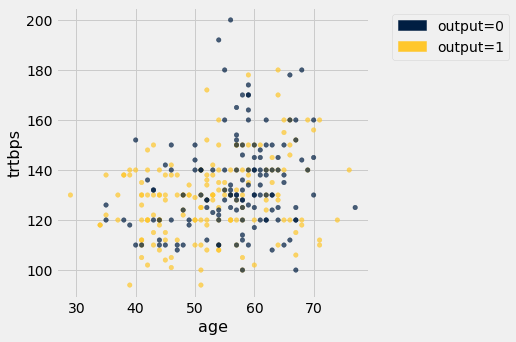

In [ ]:
# write your solution for Task 1 in this code cell
#1
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#2
heart = Table.read_table('heart.csv')
heart

#3
heart.show(10)

#4
heart_scat = heart.scatter("age", "trtbps",group = "output")
heart_scat

# Task 2: Estimation

In the second step, we will focus on cholesterol level, calculate descriptive statistic values for the dataset, and estimate the average cholesterol level of the population from which the dataset was sampled.

1.   Print the following statistic values for the cholesterol level (variable `chol`): mean, median, and standard deviation.
2.   Display a histogram of the cholesterol level with 20 bins.
3.   Assuming that the dataset is a sample that was drawn uniformly at random from some population, apply the **bootsrap method** to calculate a 90% confidence interval for the mean cholesterol level of the population (see
     1.   To obtain the bootstrap empirical distribution of the mean, re-sample the dataset at least 10,000 times and store the mean values in a table.
     2.   Display the bootstrap empirical distribution of the mean as a histogram with 50 bins.
     3.   Calculate a 90% confidence interval for the mean and print the two endpoints of the interval.


The mean of cholestrol is:  246.264026403
The median of cholestrol is:  240.0
The standard deviation of cholestrol is:  51.7451510105
5th percentile of bootstrap medians: 241.402640264
95th percentile of bootstrap medians: 251.257425743


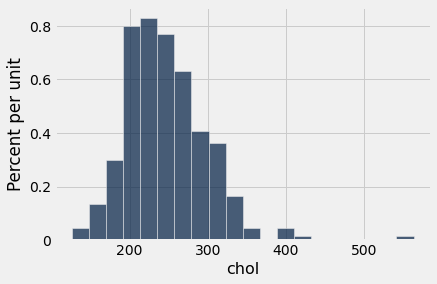

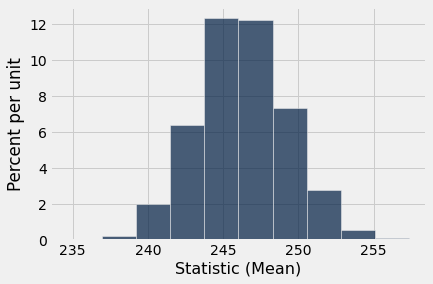

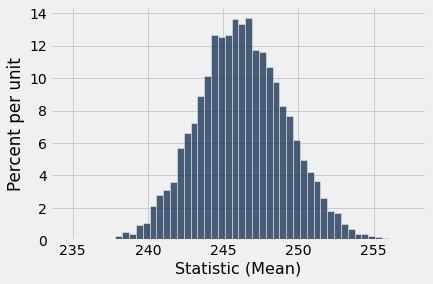

In [ ]:
# write your solution for Task 2 in this code cell

#1
chol_mean = heart.column('chol')
print("The mean of cholestrol is: ", np.mean(chol_mean))

chol_median = heart.column('chol')
print("The median of cholestrol is: ", np.median(chol_median))

chol_stdev = heart.column('chol')
print("The standard deviation of cholestrol is: ", np.std(chol_stdev))

#2
heart.hist('chol', bins=20)

#3
#sample = heart.sample(500, with_replacement=False)
bootstrap = Table().with_columns('Iteration', make_array(),
                                 'Statistic (Mean)', make_array())
for i in np.arange(10000):
  resample = heart.sample(heart.num_rows, with_replacement=True)
  statistic = np.mean(resample.column('chol'))
  bootstrap.append((i, statistic))
bootstrap
bootstrap.hist('Statistic (Mean)')
medians = bootstrap.column('Statistic (Mean)')
bootstrap_lower = percentile(5, medians)
boostrap_higher = percentile(95, medians)
print("5th percentile of bootstrap medians:", bootstrap_lower)
print("95th percentile of bootstrap medians:", boostrap_higher)
bootstrap.hist('Statistic (Mean)', bins = 50)

# Task 3: Hypothesis Testing
Next, we will focus on resting electrocardiographic (ECG) results (variable `restecg`) and perform a hypothesis test to determine if these results are related to the likelihood of heart attack.

1.   Create two new tables: one consisting of patients with normal ECG results (value of `restecg` being 0) and one consisting of patients with abnormal ECG results (value of `restecg` being 1 or 2).
2.   Print the mean of variable `output` for both patients with normal ECG results and patients with abnormal ECG results (note that since variable `output` is binary, these mean values are actually the fraction of patients in each group who are likely to have a heart attack).
3.   Perform a **hypothesis test** to determine if ECG results and the likelihood of heart attack are related
     1. Let the null hypothesis be that the distribution of variable `output` is the same for patients with normal and abnormal ECG results.
     2. Let the test statistic be the absolute value of the difference between the mean values of variable `output` for patients with normal and abnormal ECG results.
     3. Calculate and print the observed test statistic based on the observed data of the two groups of patients.
     4. To obtain the empirical distribution of the test statistic under the null hypothesis, simulate the test statistic at least 10,000 times by combining the observed data of the two groups into one array and sampling two arrays uniformly at random, calculating and storing the simulated test statistic in a table.
     5. Display the empirical distribution of the test statistic as histogram with 20 bins.
     6. Calculate and print the *p*-value for the observed test statistic, and write a few sentences about whether you would reject the null hypothesis and what this means for ECG results and heart attacks.


The mean of ecg output is:  0.462585034014
The mean of abecg output is:  0.621794871795
0.159209837781


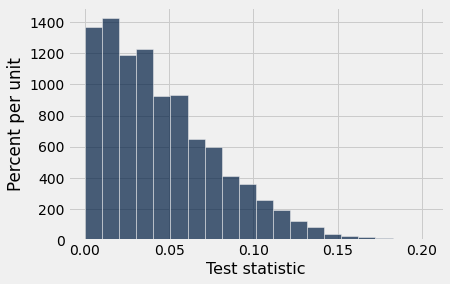

In [ ]:
# write your solution for Task 3 in this code cell

#1
ecg = heart.where('restecg', are.equal_to(0))
ecg
abecg = heart.where('restecg', are.above(0))
abecg

#2
output_ecg = np.mean(ecg["output"])
print("The mean of ecg output is: ", output_ecg)
output_abecg = np.mean(abecg["output"])
print("The mean of abecg output is: ", output_abecg)

#3
observed = abs(np.average(output_ecg)-np.average(output_abecg))
print(observed)

heartattack = np.append(ecg.column("output"), abecg.column("output"))

table = Table().with_columns("Iteration", make_array(), "Test statistic", make_array())

for i in np.arange(10000):
  testers = np.random.choice(heartattack, len(ecg["output"]))
  developers = np.random.choice(heartattack, len(abecg["output"]))
  value = abs(np.average(testers) - np.average(developers))
  table.append((i, value))

table.hist("Test statistic", bins=20)

# Task 4: Prediction

Finally, let's build machine-learning models to predict the likelihood of heart attack (variable `output`) based on all the other features.

1.   Create a new table by converting the values of variables `age`, `trtbps`, `chol`, `thalachh`, and `oldpeak` to standard units (leave the values of other variables unnormalized).
2.   Extract the values of the features (all variables except for `output`) and the values of the label (variable `output`) into NumPy arrays.
3.   Divide both feature and label values into training and test sets with a 70% to 30% split (see function `train_test_split` from *Lab Assignment 10*).
4.   Train and evaluate (a) k-NN, (b) XGBoost, and (c) neural network predictors.
     1. Import the necessary `scikit-learn` or `xgboost` module.
     2. Create a model and fit it to the training set.
     3. Apply the model to the test set to obtain predicted label values.
     4. Calculate and print the accuracy of the predictions by comparing the ground truth and predicted labels.



In [ ]:
# write your solution for Task 4 in this code cell

#1
def std_units(table,column_name):
  column = table.column(column_name)
  mean_col = np.mean(column)
  print("The mean is: ", mean_col)
  stdev_col = np.std(column)
  print("The std is: ", stdev_col)
  return (column-mean_col)/stdev_col

normal = heart.with_columns("age",std_units(heart, "age"), "trtbps",std_units(heart, "trtbps"), "chol",std_units(heart, "chol"), "thalachh",std_units(heart, "thalachh"), "oldpeak",std_units(heart, "oldpeak"))
normal

#2
feature = normal.drop("output").values
feature
label = normal.column("output")
label

#3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, label, train_size=0.7)

#4
from xgboost import XGBClassifier
from xgboost import plot_tree
# XGBoost model using all features
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)

predicted_Y = xgboost_model.predict(X_test)
print("XGBClassifier with all features")
print("Test Accuracy:", sum(y_test == predicted_Y) / len(predicted_Y))

xgb_prediction = predicted_Y


The mean is:  54.3663366337
The std is:  9.06710163858
The mean is:  131.623762376
The std is:  17.5091780657
The mean is:  246.264026403
The std is:  51.7451510105
The mean is:  149.646864686
The std is:  22.8673325819
The mean is:  1.0396039604
The std is:  1.15915747324
XGBClassifier with all features
Test Accuracy: 0.813186813187


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predicted_y = knn.predict(X_test)
print("Test Accuracy:", sum(y_test == predicted_y) / len(predicted_y))

knn_prediction = predicted_y

Test Accuracy: 0.802197802198


In [ ]:
from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier()
neural_network.fit(X_train, y_train)
y_pred = neural_network.predict(X_test)
accuracy = sum(y_test == y_pred) / len(y_pred)
print("Accuracy:", accuracy)

neural_prediction = y_pred

Accuracy: 0.846153846154


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Precision and Recall

Calculate the **precision** and **recall** error metrics (see *Part 3* of *Lab Assignment 8* for a reminder) for each predictor that you trained in the previous task and discuss in a few sentences what these metrics mean *for this dataset* (i.e., what are the practical implications of different types of errors considering what the values 0 and 1 represent for variable `output`).

In [ ]:
# write your solution in this code cell
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


precision = precision_score(y_test, xgb_prediction)
recall = recall_score(y_test, xgb_prediction)
print("xgb precision: ", precision)
print("xgb recall: ", recall)

precision2 = precision_score(y_test, knn_prediction)
recall2 = recall_score(y_test, knn_prediction)
print("knn precision: ", precision2)
print("knn recall: ", recall2)

precision3 = precision_score(y_test, neural_prediction)
recall3 = recall_score(y_test, neural_prediction)
print("neural precision: ", precision3)
print("neural recall: ", recall3)

xgb precision:  0.792452830189
xgb recall:  0.875
knn precision:  0.777777777778
knn recall:  0.875
neural precision:  0.84
neural recall:  0.875
